In [2]:
df = pd.read_csv('tvmarketing.csv')
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
df.dtypes


TV       float64
Sales    float64
dtype: object

In [4]:
df.shape

(200, 2)

In [5]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


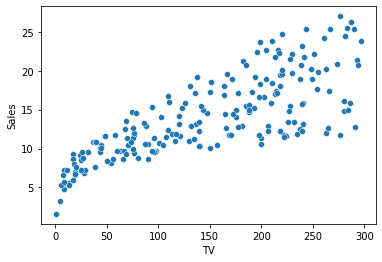

In [6]:

sns.scatterplot(x=df['TV'] , y = df['Sales'])
plt.show()

In [7]:
x = df[['TV']]
y = df['Sales']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 42 , test_size = 0.3)

In [10]:
X_train.shape

(140, 1)

In [11]:
X_test.shape

(60, 1)

In [12]:
x_np = X_train.values.flatten()
y_np = y_train.values

mean_x = np.mean(x_np)
mean_y = np.mean(y_np)

num = sum((x_np - mean_x)*(y_np - mean_y))
den = sum((x_np - mean_x) ** 2)

slope = num / den 

inter = mean_y - slope*mean_x

print(slope , inter)

0.04640780212815275 7.23945983075114


In [13]:
y_pred = slope * X_test.values + inter

In [14]:
y_pred

array([[14.81785392],
       [16.30754437],
       [20.83230507],
       [ 7.78243112],
       [17.46309864],
       [10.72468577],
       [17.30067133],
       [ 9.55984994],
       [17.56055502],
       [15.36546598],
       [ 8.7013056 ],
       [ 9.84757831],
       [18.12208943],
       [ 7.49006196],
       [13.71334823],
       [15.13806775],
       [ 7.57823679],
       [16.40964153],
       [10.73396733],
       [18.25667206],
       [17.89005042],
       [10.38590882],
       [ 9.00295631],
       [18.88317738],
       [10.44159818],
       [ 9.72227724],
       [17.14752559],
       [13.70406667],
       [11.28622018],
       [ 7.62928537],
       [16.5117387 ],
       [10.45087974],
       [16.46997167],
       [ 8.02375169],
       [20.26612989],
       [18.2937983 ],
       [ 9.48095667],
       [19.94127527],
       [12.67845424],
       [ 8.51567439],
       [12.62276488],
       [15.45364081],
       [ 9.2396361 ],
       [10.1306659 ],
       [17.63480751],
       [ 9

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_p = model.predict(X_test)
print(y_p)

[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 18.2937983
  9.48095667 19.94127527 12.67845424  8.51567439 12.62276488 15.45364081
  9.2396361  10.1306659  17.63480751  9.01223787 10.51585066 14.07532908
 12.09371593 10.78037513 10.86854996 15.05453371  7.64320771  7.60144069
 10.78501591 13.24462943 10.64579251 20.68380011  8.14905275 16.40964153]


In [19]:
model.coef_

array([0.0464078])

In [20]:
model.intercept_

np.float64(7.239459830751138)

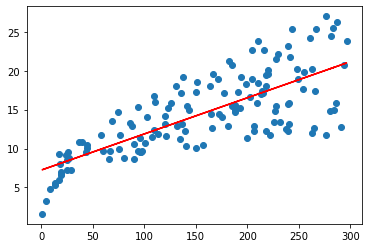

In [24]:
plt.scatter(X_train , y_train)
plt.plot(X_train , model.predict(X_train) , color = 'red')

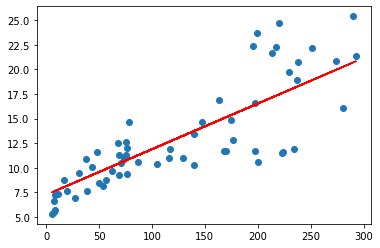

In [26]:
plt.scatter(X_test , y_test)
plt.plot(X_test , y_p , color = 'red')

In [27]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test , y_p)
r2 = r2_score(y_test , y_p)

In [28]:
mse

8.970991242413614

In [29]:
r2

0.6714477229302764